<a href="https://colab.research.google.com/github/Champa-07/Feature-Engineering/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering- Handling the missing values

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('titanic.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1]:
df[df['Embarked'].isnull()]

NameError: ignored

###### Above is the example of Missing Completely at Random

# Missing data not at Random:Systamic missing values
There is absolutely some relationship between the data missing and any other values, observed or missing within the dataset

In [ ]:
##Creating new column by replacing cabin null values with 1 n 0 

In [ ]:
import numpy as np
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['Cabin_null'].mean()

0.7710437710437711

In [ ]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

The Percentage of Survived people whose data is missing is 0.6

The Percentage of Non Survived People whose data is missing is 0.8

# Missing At Random
Men hide their salary

Women hide their age

## All Techniques to handle the missing values

1.Mean/Median/Mode replacement
2.Random sample Imputation
3.Capturing Nan values with a new feature
4.End of Distribution Imputation
5.Arbitary Imputation
6.Freuent category imputation


#### Mean/Median/Mode Replacement

when should we apply?

It has the assumption that the data are missing completely at Random
We solev this by Replacing the Nan with The most freuents occurance of variables

In [ ]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [ ]:
median=df.Age.median()
median

28.0

In [ ]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

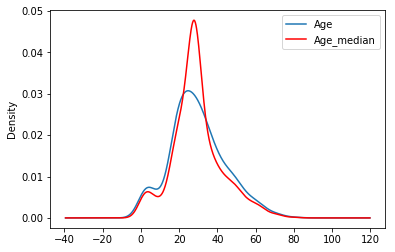

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')